# Case: Impact of p_negative

Situation: 
- 70% agent availability on weekdays and weekends

Task:
- Evaluate Shift Coverage over p_negative: [.001, .0025, .005, .0075, .01, .02, .03, .05, .1, .2]
- Evaluate Agent Satisfaction over p_negative: [.001, .0025, .005, .0075, .01, .02, .03, .05, .1, .2]

In [8]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [9]:
import time
from datetime import datetime

import abm_scheduling.Log
from abm_scheduling.Log import Log as Log

import matplotlib.pylab as plt
%matplotlib inline

log = Log()

## Define situation

In [10]:
num_nurses_per_shift = 5
num_nurses = 25
degree_of_agent_availability = 0.7
works_weekends = True

p_negatives = [.001, .0025, .005, .0075, .01, .02, .03, .05, .1, .2]

In [11]:
schedule = Schedule(num_nurses_needed=num_nurses_per_shift, is_random=True)
model = abm_scheduling.NSP_AB_Model()
nurses = model.generate_nurses(num_nurses=num_nurses,
                               degree_of_agent_availability=degree_of_agent_availability,
                               works_weekends=works_weekends)

schedule.print_schedule(schedule_name="Intial Situation")

Week's Schedule Intial Situation
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 7  | need: 6  | need: 5  | need: 8  | need: 5  | need: 6  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 5  | need: 5  | need: 6  | need: 7  | need: 7  | need: 4  | need: 6  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 7  | need: 7  | need: 5  | need: 6  | need: 4  | need: 6  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [12]:
p_neg_reg_util_results = []
for p_neg in p_negatives:
    p_neg_reg_util_result = model.run(schedule_org=schedule,
                                     nurses_org=nurses,
                                     p_to_accept_negative_change=p_neg,
                                     utility_function_parameters=None,
                                     print_stats=False)
    p_neg_reg_util_results.append(p_neg_reg_util_result)

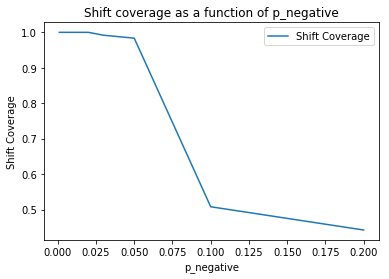

In [13]:
plt.figure()
plt.plot(p_negatives, [r.shift_coverage for r in p_neg_reg_util_results], label="Shift Coverage")
plt.title(f'Shift coverage as a function of p_negative')
plt.xlabel("p_negative")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()

In [15]:
p_neg_as_util_results = []
for p_neg in p_negatives:
    p_neg_as_util_result = model.run(schedule_org=schedule,
                                     nurses_org=nurses,
                                     p_to_accept_negative_change=p_neg,
                                     utility_function_parameters=None,
                                     print_stats=False)
    p_neg_as_util_results.append(p_neg_as_util_result)

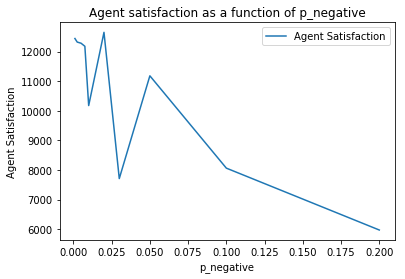

In [16]:
plt.figure()
plt.plot(p_negatives, [r.total_agent_satisfaction for r in p_neg_as_util_results], label="Agent Satisfaction")
plt.title(f'Agent satisfaction as a function of p_negative')
plt.xlabel("p_negative")
plt.ylabel("Agent Satisfaction")
plt.legend()
plt.show()